In [103]:
# Make sure proper docker container is installed for 
import pandas as pd
import os
import seaborn as sns
from pyathena import connect
from pyathena.pandas_cursor import PandasCursor
ATHENA_RESULTS = os.environ["ATHENA_RESULTS"]
pf = os.environ['AWS_LP']
ATHENA_CURSOR = connect(s3_staging_dir=ATHENA_RESULTS,
                        region_name='us-east-1',
                        profile_name=pf,
                        cursor_class=PandasCursor).cursor()

In [99]:
query = f'''
    SELECT location_desc, 
            value, 
            domaincat_desc
    FROM crop_data.usda_crop_data
    WHERE year = 2017
'''
df = ATHENA_CURSOR.execute(query).as_pandas()

In [100]:
len(df.columns)

3

In [104]:
df.head()

,location_desc,value,domaincat_desc
0,DELAWARE,"1,647,000",ORGANIZATION: (INSTITUTIONAL & RESEARCH & RESE...
1,DELAWARE,"492,873,000","ORGANIZATION: (TAX PURPOSES, CORPORATION)"
2,DELAWARE,"57,576,000","ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC..."
3,DELAWARE,"57,576,000","ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC..."
4,DELAWARE,"435,297,000","ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI..."


In [108]:
t = (
    df.loc[
        (~df['location_desc'].str.contains(',')) &
        (df['domaincat_desc'].str.contains('IRRIGATION'))
    ]
    .pivot(index='location_desc', columns='domaincat_desc', values='value')
    .reset_index()
    .rename_axis(None, axis=1)
    .replace(to_replace=r',', value='', regex=True)
    .set_index('location_desc')
    .apply(pd.to_numeric)
    .transpose()
)
t


location_desc,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,FLORIDA,GEORGIA,HAWAII,IDAHO,ILLINOIS,INDIANA,IOWA,KANSAS,KENTUCKY,LOUISIANA,MAINE,MARYLAND,...,NEW MEXICO,NEW YORK,NORTH CAROLINA,NORTH DAKOTA,OHIO,OKLAHOMA,OREGON,PENNSYLVANIA,RHODE ISLAND,SOUTH CAROLINA,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
IRRIGATION STATUS: (ANY ON OPERATION),720872000,22224000,2588738000,3625044000,40746160000,4637239000,354030000,530154000,6061163000,3355394000,326584000,6183637000,1811579000,1821363000,1042880000,7180899000,603647000,1428196000,248646000,712756000,...,1706512000,900082000,2356576000,690307000,881074000,1397048000,3662408000,1572474000,33994000,880986000,1526138000,914742000,9447456000,1315325000,65493000,786057000,7776322000,52486000,1788227000,1040340000
IRRIGATION STATUS: (HARVESTED CROPLAND IS ENTIRELY IRRIGATED),222363000,16538000,1871191000,1815881000,34547232000,2784033000,193610000,92884000,4215601000,884321000,247621000,4241126000,242189000,162081000,122305000,906228000,99563000,470438000,68957000,196158000,...,1184643000,305118000,569820000,74251000,361278000,417648000,1970043000,840570000,17199000,257070000,117328000,179646000,4083146000,953233000,15137000,154938000,5533473000,26114000,369661000,686841000
IRRIGATION STATUS: (NONE ON OPERATION),5259723000,48235000,1263270000,6026116000,4408199000,2854463000,226084000,935819000,1296180000,6217859000,237219000,1383803000,15198393000,9285973000,27913575000,11601827000,5134273000,1744782000,418316000,1760049000,...,875831000,4469129000,10544098000,7543795000,8460151000,6068465000,1344414000,6186410000,24005000,2127753000,8195385000,2884192000,15476586000,523285000,715476000,3174444000,1858140000,701793000,9639195000,431772000


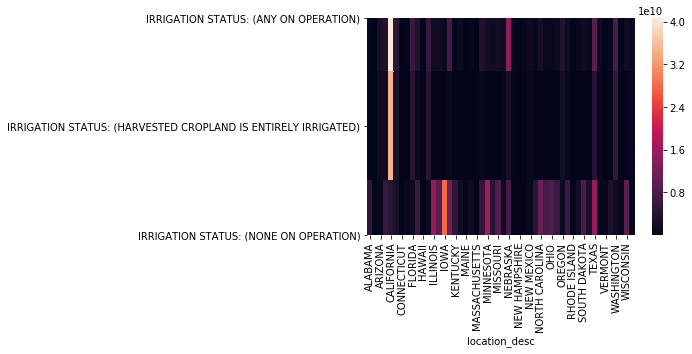

In [109]:
sns.heatmap(t)

In [31]:
df2.domaincat_desc.unique()

array(['OPERATORS: (1 OPERATORS)', 'OPERATORS: (2 OR MORE OPERATORS)',
       'OPERATORS: (ETHNICITY = HISPANIC)',
       'OPERATORS: (RACE = AMERICAN INDIAN OR ALASKA NATIVE, ALONE OR COMBINED WITH OTHER RACES)',
       'OPERATORS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER RACES)',
       'OPERATORS: (RACE = BLACK OR AFRICAN AMERICAN, ALONE OR COMBINED WITH OTHER RACES)',
       'OPERATORS: (RACE = NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER, ALONE OR COMBINED WITH OTHER RACES)',
       'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER RACES)',
       'OPERATORS, PRINCIPAL: (ETHNICITY = HISPANIC)',
       'OPERATORS, PRINCIPAL: (GENDER = FEMALE)',
       'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL FARMING))',
       'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL FARMING), AGE 25 TO 34)',
       'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL FARMING), AGE 35 TO 44)',
       'OPERATORS, PRINCIPAL: (PRIMARY OCCUPATION, (EXCL FARMING), AGE 45 TO 54)',
       'OPERATORS, 